In [131]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn. preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
import tensorflow as tf
import os

In [132]:
import cv2
import matplotlib.pyplot as plt

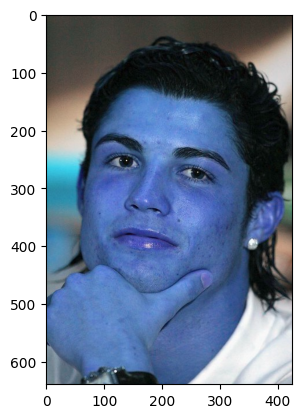

In [133]:
# img = cv2.imread('C:\\programowanie\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\model\\images_dataset\\Ronaldo\\735216.png')
img = cv2.imread('C:\\programowanie\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\model\\images_dataset\\Ronaldo\\187520785_e277112807_z.jpg')

img.shape
plt.imshow(img,)

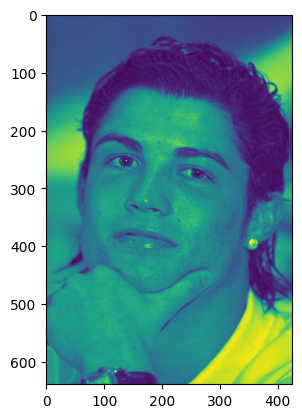

In [134]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

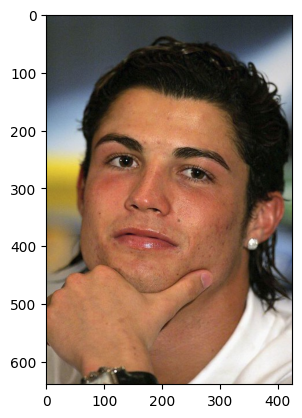

In [135]:
RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(RGB)


In [136]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
path_face = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
path_eyes = os.path.join(cv2_base_dir,'data/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier(path_face)
eyes_cascade = cv2.CascadeClassifier(path_eyes)

In [137]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[ 28, 131, 331, 331]])

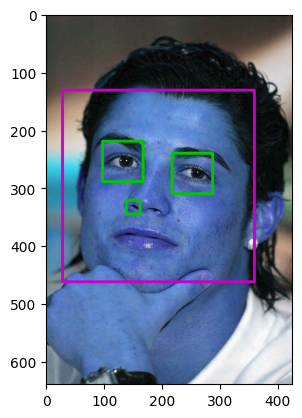

In [138]:
x,y,w,h = faces[0]
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(200,0,200),3)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,200,0),3)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

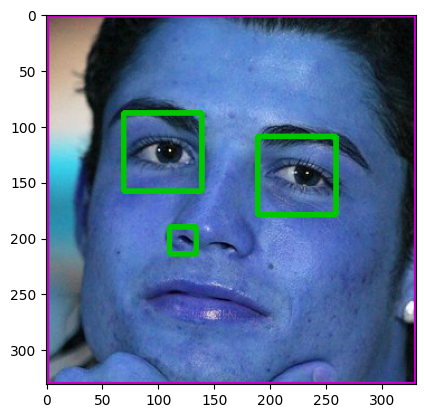

In [139]:
plt.imshow(roi_color)#roi = regoin of interest

In [140]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [141]:
def Get_face_from_picture(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:

            return roi_color

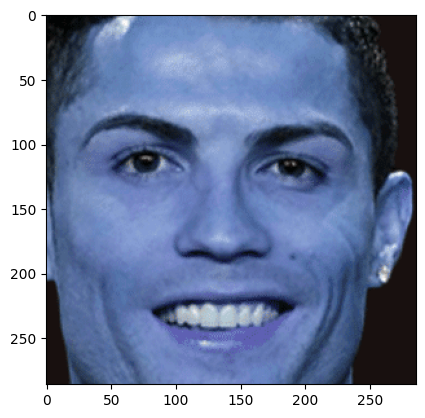

In [142]:
Croped_picture = Get_face_from_picture("C:\\PYTHON_KURSY\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\images_dataset\\Ronaldo\\best-looks-of-ronaldo-on-his-face-structure.png")
plt.imshow(Croped_picture)

In [143]:
path_to_dataset = "./images_dataset/"


path_to_cropped_dataset = "./images_dataset/cropped/"

In [144]:
img_dirs = []
for entry in os.scandir(path_to_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images_dataset/cropped',
 './images_dataset/Ronaldo',
 './images_dataset/Tyson',
 './images_dataset/ZAdrian']

In [145]:

import shutil
if os.path.exists(path_to_cropped_dataset):
     shutil.rmtree(path_to_cropped_dataset)
os.mkdir(path_to_cropped_dataset)

In [146]:
cropped_image_dirs = []
file_names = {}
for img_dir in img_dirs:
    count =1
    name = img_dir.split('/')[-1]
    file_names[name] = []
    print(name,img_dir)
    for entry in os.scandir(img_dir):
        roi_color =  get_cropped_image_if_2_eyes(entry.path)
        print(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_dataset + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name = name +str(count) + ".png"
            cropped_file_path = cropped_folder +"/" + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            file_names[name].append(cropped_file_path)
            count = count + 1

               

cropped ./images_dataset/cropped
Ronaldo ./images_dataset/Ronaldo
./images_dataset/Ronaldo\13-Cristiano-Ronaldo-before-after-icerik.jpg
./images_dataset/Ronaldo\13-Cristiano-Ronaldo-before-after-kapak-1.webp
./images_dataset/Ronaldo\16799488611085.jpg
./images_dataset/Ronaldo\16819985256069943902_1200x630.jpg
./images_dataset/Ronaldo\1683745410899_872ad775-e095-415a-b27d-dff6af17d5e4.jpg
./images_dataset/Ronaldo\187520692_9ce0e1e0a5_c.jpg
./images_dataset/Ronaldo\187520785_e277112807_z.jpg
./images_dataset/Ronaldo\2.ronaldo_564x694.png
./images_dataset/Ronaldo\2576.jpeg
./images_dataset/Ronaldo\37ec3e33bebcfea360ffbcb5bcc191c3.jpg
./images_dataset/Ronaldo\510ifcHqYL._AC_UY1000_.jpg
./images_dataset/Ronaldo\66765811-0-image-a-123_1674165413087.jpg
./images_dataset/Ronaldo\6991ed12852d46ff85e087670d5a870d.webp
./images_dataset/Ronaldo\69a4d70c489a4e559b80708720eb623e.jpeg
./images_dataset/Ronaldo\7089038597590_trans_NvBQzQNjv4BqqVzuuqpFlyLIwiB6NTmJwauLYewjGO21NF-o1gxbkUI.jpeg
./images_da